In [14]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [15]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (6607, 20)

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_I

In [16]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_columns)}")

for col in categorical_columns:
    print(f"\n{col} unique values: {df[col].unique()}")

Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Number of duplicate rows: 0

Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Dista

In [17]:
# Handle missing values
# Fill missing values in Teacher_Quality with mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

# Fill missing values in Distance_from_Home with mode
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Fill missing values in Parental_Education_Level with mode
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())

print(f"\nFinal dataset shape: {df.shape}")

Missing values after cleaning:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Final dataset shape: (6607, 20)


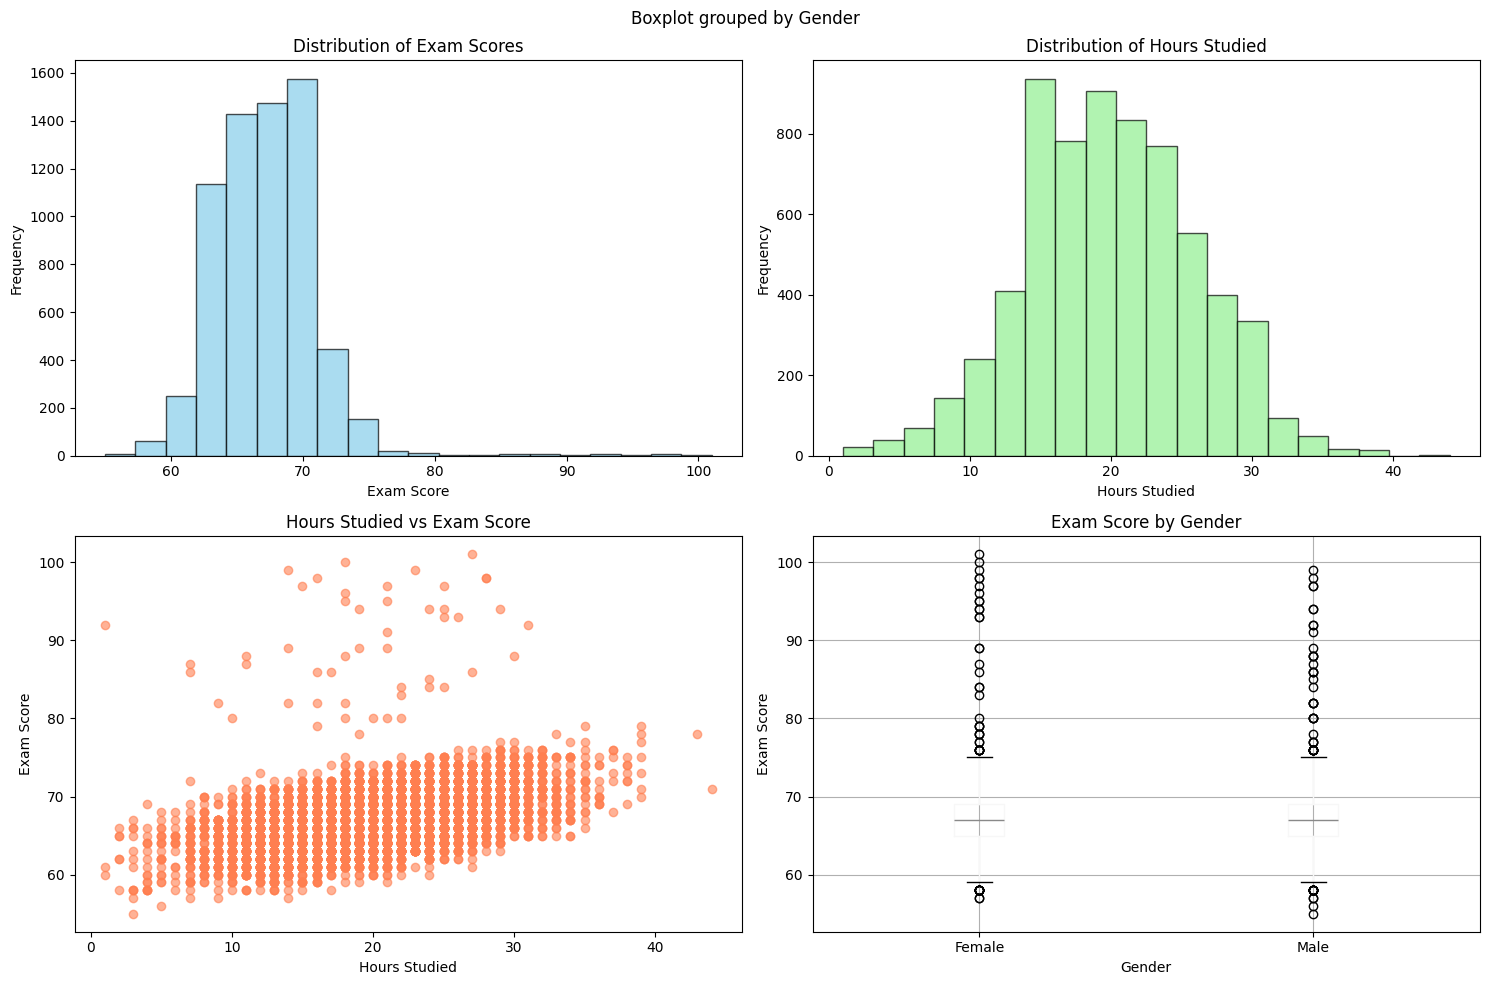

In [18]:
# Basic Data Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of Exam Scores
axes[0, 0].hist(df['Exam_Score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Exam Scores')
axes[0, 0].set_xlabel('Exam Score')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Hours Studied
axes[0, 1].hist(df['Hours_Studied'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Hours Studied')
axes[0, 1].set_xlabel('Hours Studied')
axes[0, 1].set_ylabel('Frequency')

# Scatter plot: Hours Studied vs Exam Score
axes[1, 0].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='coral')
axes[1, 0].set_title('Hours Studied vs Exam Score')
axes[1, 0].set_xlabel('Hours Studied')
axes[1, 0].set_ylabel('Exam Score')

# Box plot: Gender vs Exam Score
df.boxplot(column='Exam_Score', by='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Exam Score by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

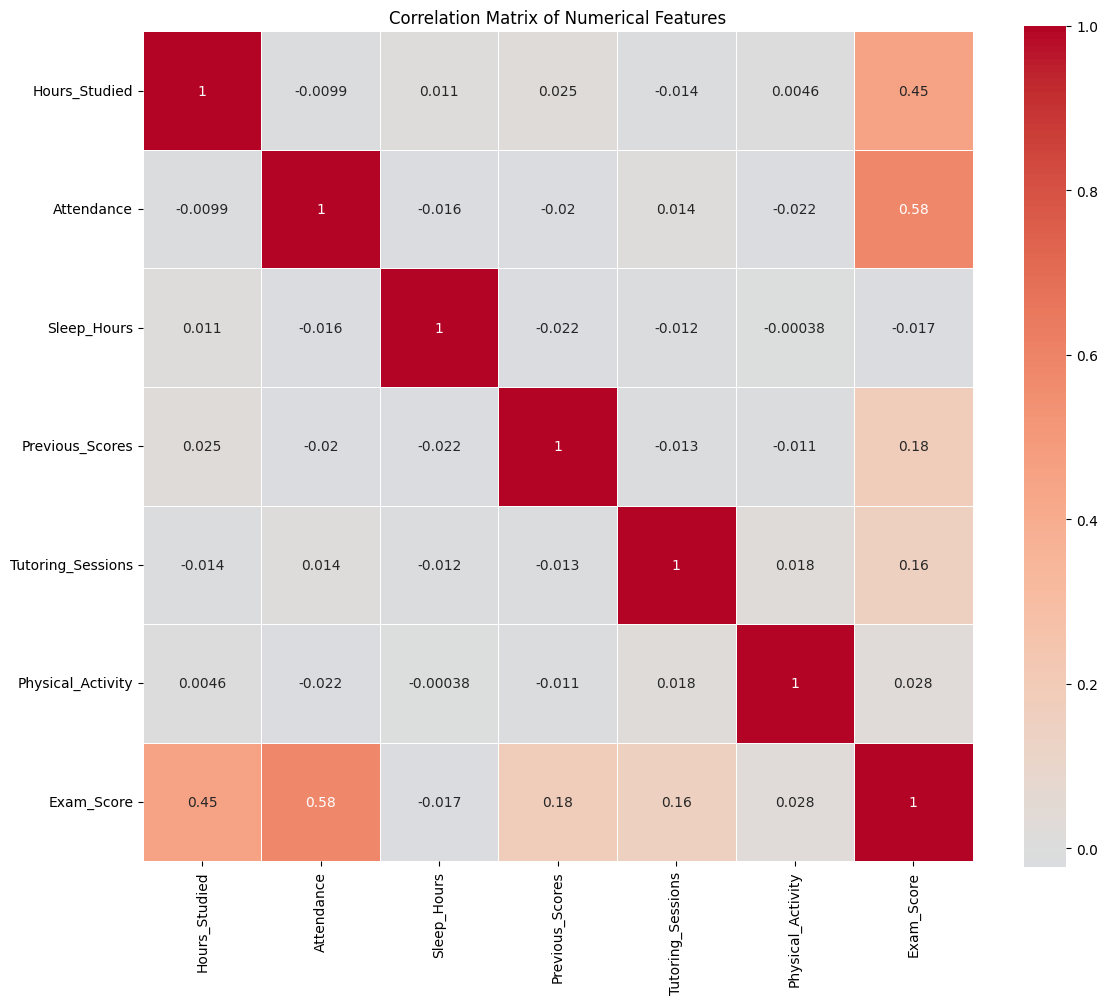

Correlation with Exam Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


In [19]:
# Correlation Analysis
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show correlation with Exam_Score specifically
print("Correlation with Exam Score:")
exam_score_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print(exam_score_corr)

In [20]:
# Prepare data for modeling
# For the basic task, we'll focus on Hours_Studied as the main predictor
# But let's also include other important numerical features

# Select features for the model
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
           'Tutoring_Sessions', 'Physical_Activity']

X = df[features]
y = df['Exam_Score']

print("Selected Features:")
print(X.head())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check for any remaining missing values in selected features
print(f"\nMissing values in features: {X.isnull().sum().sum()}")

Selected Features:
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  
0                  3  
1                  4  
2                  4  
3                  4  
4                  4  

Features shape: (6607, 6)
Target shape: (6607,)

Missing values in features: 0


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {(X_train.shape[0] / len(df)) * 100:.1f}%")
print(f"Testing set percentage: {(X_test.shape[0] / len(df)) * 100:.1f}%")

Training set size: 5285 samples
Testing set size: 1322 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


In [22]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Linear Regression Model Trained Successfully!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("\nFeature Importance (by coefficient magnitude):")
print(feature_importance)

Linear Regression Model Trained Successfully!
Model coefficients: [ 0.28926911  0.19866732 -0.03351931  0.0482109   0.50986583  0.15110363]
Model intercept: 40.97457017291116

Feature Importance (by coefficient magnitude):
             Feature  Coefficient  Abs_Coefficient
4  Tutoring_Sessions     0.509866         0.509866
0      Hours_Studied     0.289269         0.289269
1         Attendance     0.198667         0.198667
5  Physical_Activity     0.151104         0.151104
3    Previous_Scores     0.048211         0.048211
2        Sleep_Hours    -0.033519         0.033519


In [23]:
# Evaluate Model Performance
# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance Evaluation:")
print("=" * 40)
print("Training Set Metrics:")
print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"  R-squared (R²): {train_r2:.4f}")

print("\nTesting Set Metrics:")
print(f"  Mean Squared Error (MSE): {test_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"  R-squared (R²): {test_r2:.4f}")

print(f"\nModel explains {test_r2*100:.2f}% of the variance in exam scores")

Model Performance Evaluation:
Training Set Metrics:
  Mean Squared Error (MSE): 6.3352
  Root Mean Squared Error (RMSE): 2.5170
  Mean Absolute Error (MAE): 1.3245
  R-squared (R²): 0.5881

Testing Set Metrics:
  Mean Squared Error (MSE): 5.0655
  Root Mean Squared Error (RMSE): 2.2507
  Mean Absolute Error (MAE): 1.2659
  R-squared (R²): 0.6416

Model explains 64.16% of the variance in exam scores


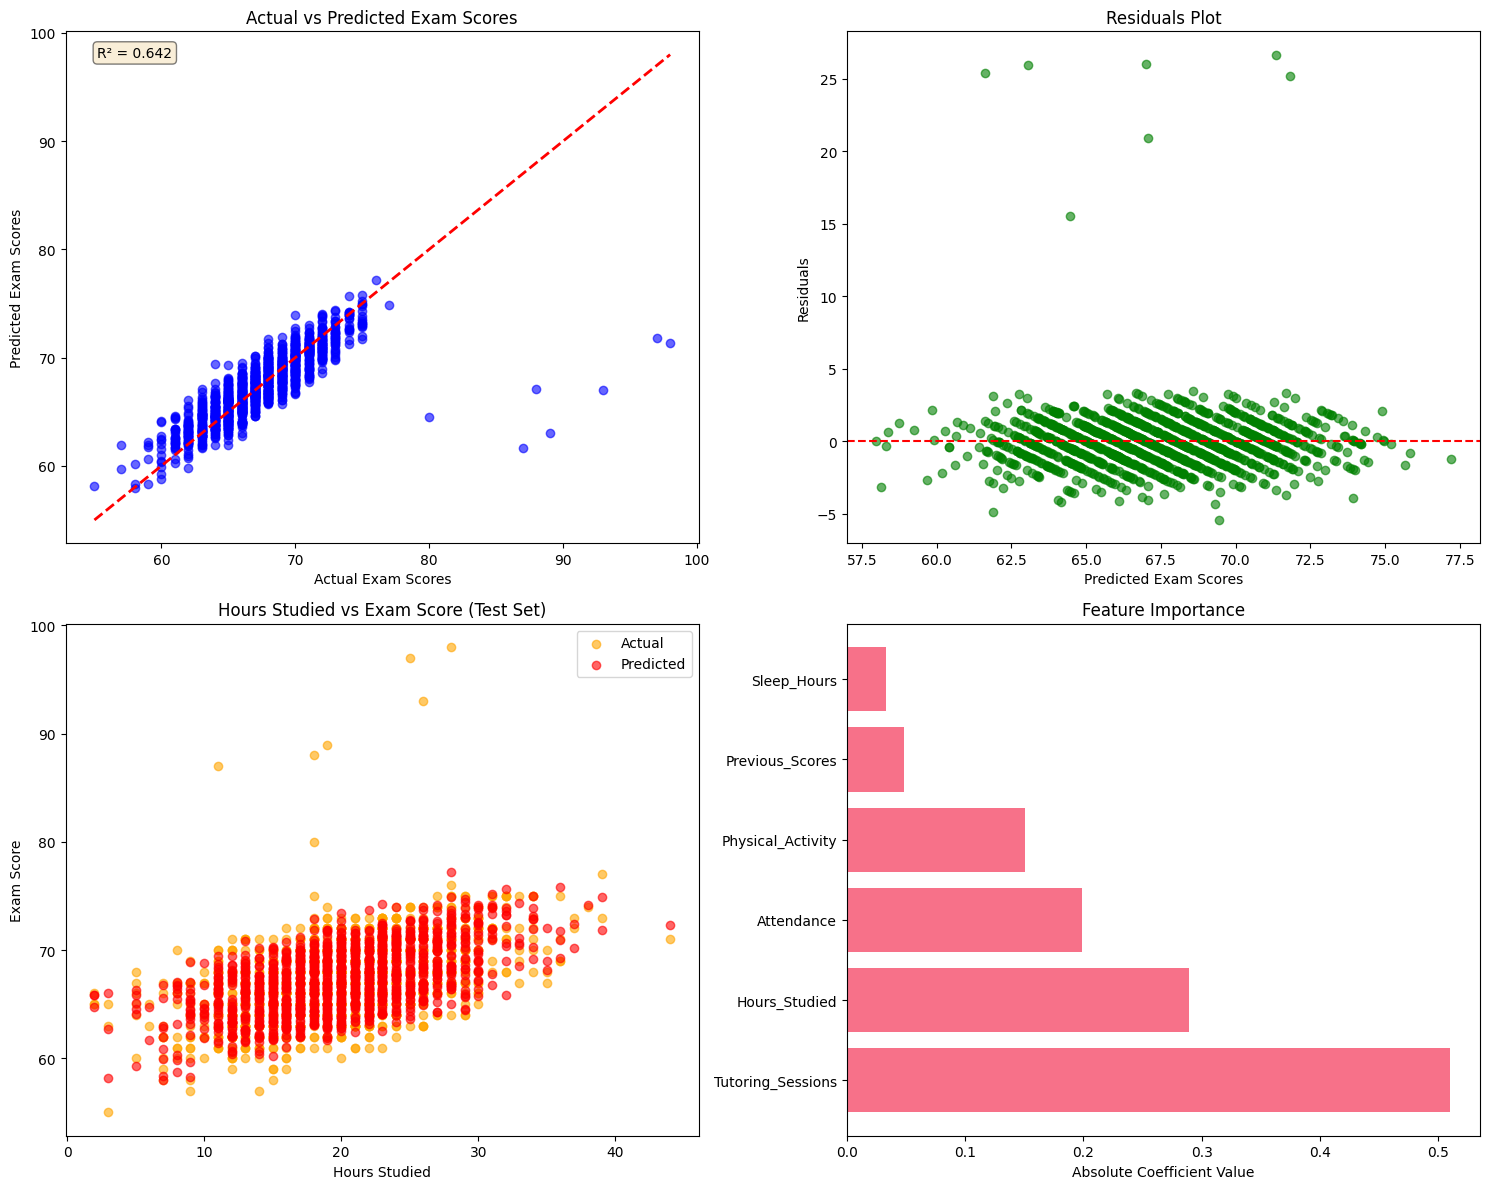

In [24]:
# Visualize Predictions and Model Performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Exam Scores')
axes[0, 0].set_ylabel('Predicted Exam Scores')
axes[0, 0].set_title('Actual vs Predicted Exam Scores')
axes[0, 0].text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuals plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Exam Scores')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals Plot')

# 3. Hours Studied vs Exam Score with regression line
axes[1, 0].scatter(X_test['Hours_Studied'], y_test, alpha=0.6, color='orange', label='Actual')
axes[1, 0].scatter(X_test['Hours_Studied'], y_test_pred, alpha=0.6, color='red', label='Predicted')
axes[1, 0].set_xlabel('Hours Studied')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Hours Studied vs Exam Score (Test Set)')
axes[1, 0].legend()

# 4. Feature importance bar plot
axes[1, 1].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
axes[1, 1].set_xlabel('Absolute Coefficient Value')
axes[1, 1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

In [25]:
# Bonus: Try Polynomial Regression for comparison
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create polynomial features (degree 2)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Train polynomial model
poly_model.fit(X_train, y_train)

# Make predictions
y_train_poly_pred = poly_model.predict(X_train)
y_test_poly_pred = poly_model.predict(X_test)

# Evaluate polynomial model
poly_train_r2 = r2_score(y_train, y_train_poly_pred)
poly_test_r2 = r2_score(y_test, y_test_poly_pred)
poly_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))

print("Polynomial Regression (Degree 2) Results:")
print("=" * 45)
print(f"Training R²: {poly_train_r2:.4f}")
print(f"Testing R²: {poly_test_r2:.4f}")
print(f"Testing RMSE: {poly_test_rmse:.4f}")

print("\nComparison:")
print(f"Linear Regression R²: {test_r2:.4f}")
print(f"Polynomial Regression R²: {poly_test_r2:.4f}")
print(f"Improvement: {((poly_test_r2 - test_r2) / test_r2 * 100):.2f}%")

Polynomial Regression (Degree 2) Results:
Training R²: 0.5894
Testing R²: 0.6392
Testing RMSE: 2.2585

Comparison:
Linear Regression R²: 0.6416
Polynomial Regression R²: 0.6392
Improvement: -0.39%


In [26]:
# Make Predictions for New Students
# Example: Predict exam scores for students with different study hours
new_students = pd.DataFrame({
    'Hours_Studied': [10, 15, 20, 25, 30],
    'Attendance': [80, 85, 90, 95, 98],
    'Sleep_Hours': [7, 7, 8, 8, 7],
    'Previous_Scores': [70, 75, 80, 85, 90],
    'Tutoring_Sessions': [1, 2, 2, 3, 1],
    'Physical_Activity': [3, 3, 4, 4, 3]
})

predicted_scores = model.predict(new_students)

print("Predictions for New Students:")
print("=" * 35)
for i, (idx, student) in enumerate(new_students.iterrows()):
    print(f"Student {i+1}:")
    print(f"  Hours Studied: {student['Hours_Studied']}")
    print(f"  Attendance: {student['Attendance']}%")
    print(f"  Predicted Exam Score: {predicted_scores[i]:.1f}")
    print()

# Summary and Insights
print("Key Insights:")
print("=" * 20)
print("1. The linear regression model achieves an R² score of {:.3f}".format(test_r2))
print("2. Most important features (by coefficient magnitude):")
for i, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.3f}")
print("3. The model can reasonably predict exam scores based on study habits")
print("4. Average prediction error (RMSE): {:.2f} points".format(test_rmse))

Predictions for New Students:
Student 1:
  Hours Studied: 10
  Attendance: 80%
  Predicted Exam Score: 63.9

Student 2:
  Hours Studied: 15
  Attendance: 85%
  Predicted Exam Score: 67.1

Student 3:
  Hours Studied: 20
  Attendance: 90%
  Predicted Exam Score: 69.9

Student 4:
  Hours Studied: 25
  Attendance: 95%
  Predicted Exam Score: 73.0

Student 5:
  Hours Studied: 30
  Attendance: 98%
  Predicted Exam Score: 74.2

Key Insights:
1. The linear regression model achieves an R² score of 0.642
2. Most important features (by coefficient magnitude):
   - Tutoring_Sessions: 0.510
   - Hours_Studied: 0.289
   - Attendance: 0.199
3. The model can reasonably predict exam scores based on study habits
4. Average prediction error (RMSE): 2.25 points
